Load data

In [1]:
!pip uninstall umap
!pip install umap-learn
import umap.umap_ as umap
reducer = umap.UMAP(verbose=True)


     |████████████████████████████████| 88 kB 3.5 MB/s 
     |████████████████████████████████| 1.1 MB 34.0 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=d08d220b54d1686aeb5e54892a5f703ea0203504867c6e6fedd2772582f82779
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=c77aebbb32e6452b6e3131c189333b96c109777be5cadbed66832d09edb44632
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent


In [2]:
import re
import os
import requests
from tqdm.auto import tqdm
import pickle 
import numpy as np 
# import umap.umap_ as umap
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [6]:
# with open("parsed_tab_for_embed.pkl", 'rb') as f:
with open("drive/MyDrive/OrlyPred/Homomer_embeds/results/embeds_Mar_22/parsed_tab_for_embed.pkl", 'rb') as f:
  full_tab_for_embed = pickle.load(f)
print(full_tab_for_embed)

          code  nsub  QSBIO_err_prob  best_BU  homo pdb_code  \
163180  5ahz_1   3.0             0.0      1.0   1.0     5ahz   
102644  3q6m_1   6.0             0.0      1.0   1.0     3q6m   
16398   1luq_1   4.0             0.0      1.0   1.0     1luq   
108576  3t6f_1   4.0             0.0      1.0   1.0     3t6f   
26678   1srf_1   4.0             0.0      1.0   1.0     1srf   
...        ...   ...             ...      ...   ...      ...   
161880  4zt1_1   2.0            14.3      1.0   1.0     4zt1   
117840  4a56_1   2.0            14.3      1.0   1.0     4a56   
174177  5hap_1   2.0            14.3      1.0   1.0     5hap   
152497  4s2l_1   2.0            14.3      1.0   1.0     4s2l   
171148  5faq_1   2.0            14.3      1.0   1.0     5faq   

                                                    fasta  
163180  A A A V R E N A L L S S S L W V N V A L A G I ...  
102644  A A T K P I W T R N P D D I T N E E Y G E F Y ...  
16398   A E A G I T G T W Y N Q L G S T F I V T A G

In [ ]:
full_tab_for_embed

In [ ]:
# need to remove rows with None in fasta (those are superceeded pdbs)
# TODO - verify that indeed all of them are like this (455 out of 141k)
tab_for_embed = full_tab_for_embed[full_tab_for_embed['fasta'].notnull()]


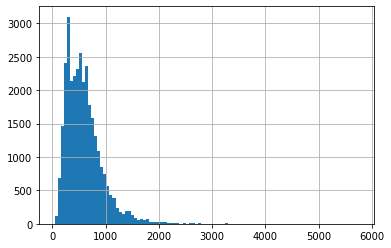

In [ ]:
fas_len = tab_for_embed.fasta.apply(len)
#fas_len[fas_len>=1000].hist(bins=100)
fas_len.hist(bins=100)

In [ ]:
# tab_for_embed = tab_for_embed.loc[fas_len[fas_len<2100].index]
# tab_for_embed

In [ ]:
with open("drive/MyDrive/OrlyPred/Homomer_embeds/results/embeds_Mar_22/embed_pkl_final_all","rb") as f:
    npy_embed_all = pickle.load(f)

In [ ]:
filt_npy_embed_all = npy_embed_all[1:]
print(filt_npy_embed_all.shape)

(31994, 1024)


In [ ]:
# tab_test = tab_for_embed.head(30001)
# tab_test = tab_for_embed
# k=tab_test[tab_test.nsub!=1.0].nsub
# print(tab_test[tab_test.nsub!=1.0].nsub)
# print(tab_test.nsub)

Unsupervised UMAP

In [ ]:
reducer = umap.UMAP(verbose=True,n_components=20,n_neighbors=200,
    min_dist=0.5)
umap_embeds = reducer.fit_transform(filt_npy_embed_all)
umap_embeds.shape

UMAP(min_dist=0.5, n_components=20, n_neighbors=200, verbose=True)
Sun Mar 27 05:15:02 2022 Construct fuzzy simplicial set
Sun Mar 27 05:15:02 2022 Finding Nearest Neighbors
Sun Mar 27 05:15:02 2022 Building RP forest with 14 trees


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


Sun Mar 27 05:15:08 2022 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	Stopping threshold met -- exiting after 3 iterations
Sun Mar 27 05:16:32 2022 Finished Nearest Neighbor Search
Sun Mar 27 05:16:36 2022 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

Sun Mar 27 05:17:44 2022 Finished embedding


(31994, 20)

In [ ]:
type(filt_npy_embed_all[0])
filt_npy_embed_all[0]

array([ 0.01530049,  0.00150336, -0.02947984, ..., -0.00454365,
       -0.00107838, -0.02347031])

In [ ]:


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.legend()
c_palette=sns.color_palette(n_colors=64)


ax.scatter(
    umap_embeds[:, 3],
    umap_embeds[:, 11],
    umap_embeds[:, 9],


    c=[c_palette[int(x)] for x in full_tab_for_embed.nsub]
    )

    # c=[c_palette[int(x)] for x in k])


Supervised UMAP

In [ ]:
with open("drive/MyDrive/OrlyPred/Homomer_embeds/results/embeds_Mar_22/train_set.pkl", 'rb') as f:
  overall_train_set = pickle.load(f)

In [ ]:
# partial_set is only the monomers, dimers, trimers and tetramers
partial_set = overall_train_set[overall_train_set["nsub"].isin([1.0,2.0,3.0,4.0])]
# partial_set.embeddings.to_numpy()
# np.vstack(partial_set.embeddings)
# (partial_set["embeddings"].values)

In [ ]:
# used n_components=20 but maybe we need 4? since there are only 4 classes
s_reducer = umap.UMAP(verbose=True,n_components=20,n_neighbors=200,
    min_dist=0.5)
s_umap_embeds_partial = s_reducer.fit_transform(np.vstack(partial_set.embeddings),y=partial_set.nsub)
s_umap_embeds_partial.shape
with open(("drive/MyDrive/OrlyPred/Homomer_embeds/results/embeds_Mar_22/all_supervised_umap_embeds_partial"), 'wb') as f:
    pickle.dump(s_umap_embeds_partial, f)


UMAP(min_dist=0.5, n_components=20, n_neighbors=200, verbose=True)
Wed Mar 23 12:31:54 2022 Construct fuzzy simplicial set
Wed Mar 23 12:31:54 2022 Finding Nearest Neighbors
Wed Mar 23 12:31:54 2022 Building RP forest with 13 trees
Wed Mar 23 12:31:55 2022 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	Stopping threshold met -- exiting after 3 iterations
Wed Mar 23 12:33:32 2022 Finished Nearest Neighbor Search
Wed Mar 23 12:33:35 2022 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

Wed Mar 23 12:35:06 2022 Finished embedding


In [ ]:
with open("drive/MyDrive/OrlyPred/Homomer_embeds/results/embeds_Mar_22/all_supervised_umap_embeds_partial", 'rb') as f:
  s_umap_embeds_partial = pickle.load(f)

In [ ]:
#changed the number of n_components since we have about 20 classes 
s_reducer = umap.UMAP(verbose=True,n_components=20,n_neighbors=200,
    min_dist=0.5)
s_umap_embeds_20 = s_reducer.fit_transform(filt_npy_embed_all,y=full_tab_for_embed.nsub)

with open(("drive/MyDrive/OrlyPred/Homomer_embeds/results/embeds_Mar_22/all_supervised_umap_embeds_20"), 'wb') as f:
    pickle.dump(s_umap_embeds_20, f)


UMAP(min_dist=0.5, n_components=20, n_neighbors=200, verbose=True)
Sun Mar 27 06:41:37 2022 Construct fuzzy simplicial set
Sun Mar 27 06:41:37 2022 Finding Nearest Neighbors
Sun Mar 27 06:41:37 2022 Building RP forest with 14 trees
Sun Mar 27 06:41:39 2022 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	Stopping threshold met -- exiting after 3 iterations
Sun Mar 27 06:42:55 2022 Finished Nearest Neighbor Search
Sun Mar 27 06:42:58 2022 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

Sun Mar 27 06:44:09 2022 Finished embedding


In [3]:
with open(("drive/MyDrive/OrlyPred/Homomer_embeds/results/embeds_Mar_22/all_supervised_umap_embeds_20"), 'rb') as f:
    s_umap_embeds_20 = pickle.load(f)


In [ ]:
# These are the original params by Tomer
s_reducer = umap.UMAP(verbose=True,n_components=64,n_neighbors=200,
    min_dist=0.5)
s_umap_embeds = s_reducer.fit_transform(filt_npy_embed_all,y=full_tab_for_embed.nsub)
s_umap_embeds.shape
with open(("drive/MyDrive/OrlyPred/Homomer_embeds/results/embeds_Mar_22/all_supervised_umap_embeds"), 'wb') as f:
    pickle.dump(s_umap_embeds, f)


In [17]:
with open(("drive/MyDrive/OrlyPred/Homomer_embeds/results/embeds_Mar_22/all_supervised_umap_embeds"), 'rb') as f:
    s_umap_embeds = pickle.load(f)


*Supervised* UMAP plot

No handles with labels found to put in legend.


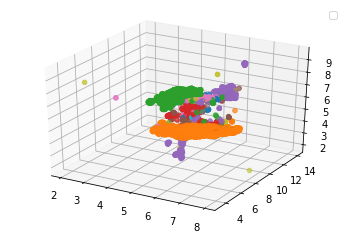

In [42]:
# good separations on 50k embeds: 64 comp, 500 neighbors, 0.5 dist; 60,15,11; 14,59,60 (blue also); 20,49,59; 15,18,19; 15,18,20; 15,18,25

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.legend()
c_palette=sns.color_palette(n_colors=64)

ax.scatter(
    # s_umap_embeds[:, 62],
    # s_umap_embeds[:, 34],
    # s_umap_embeds[:, 38],
    
    s_umap_embeds[:, 34],
    s_umap_embeds[:, 25],
    s_umap_embeds[:, 12],


    c=[c_palette[int(x)] for x in full_tab_for_embed.nsub]
    )

    # c=[c_palette[int(x)] for x in k])


In [ ]:
# # good separations on 50k embeds: 64 comp, 500 neighbors, 0.5 dist; 60,15,11; 14,59,60 (blue also); 20,49,59; 15,18,19; 15,18,20; 15,18,25
# ######################### 3D LINOY ADDITION ####################################
# import plotly.express as px
# # with open(("drive/MyDrive/all_supervised_umap_embeds_partial"), 'rb') as f:
# #     s_umap_embeds = pickle.load(f)
# with open(("drive/MyDrive/all_supervised_umap_embeds_partial"), 'rb') as f:
#     s_umap_embeds = pickle.load(f)
# c_palette=sns.color_palette(n_colors=64)
# fig = px.scatter_3d(s_umap_embeds, x=s_umap_embeds[:,2], y=s_umap_embeds[:,4], z=s_umap_embeds[:,17], color=[c_palette[int(x)] for x in tab_test.nsub])
# fig.update_traces(marker_size=8)
# fig.show()


No handles with labels found to put in legend.


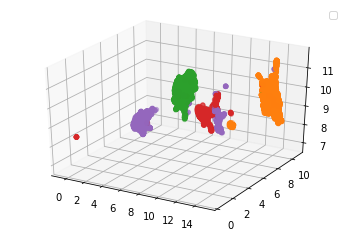

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.legend()
c_palette=sns.color_palette(n_colors=64)

ax.scatter(
    # s_umap_embeds_partial[:, 2],
    # s_umap_embeds_partial[:, 6],
    # s_umap_embeds_partial[:, 17],
    
    s_umap_embeds_partial[:, 2],
    s_umap_embeds_partial[:, 4],
    s_umap_embeds_partial[:, 17],


    c=[c_palette[int(x)] for x in partial_set.nsub]
    )

    # c=[c_palette[int(x)] for x in k])


No handles with labels found to put in legend.


IndexError: ignored

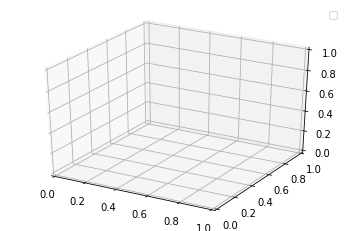

In [18]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.legend()
c_palette=sns.color_palette(n_colors=64)

ax.scatter(
    
    s_umap_embeds_20[:, 1],
    s_umap_embeds_20[:, 62],
    s_umap_embeds_20[:, 17],


    c=[c_palette[int(x)] for x in full_tab_for_embed.nsub]
    )

    # c=[c_palette[int(x)] for x in k])


In [ ]:
# import seaborn as sns

c_palette=sns.color_palette(n_colors=64)
c_palette[6]

(0.8901960784313725, 0.4666666666666667, 0.7607843137254902)

In [ ]:
print(tab_for_embed.groupby("nsub").size().count(), "- number of different oligomeric assemblies")
print(tab_for_embed.shape, "shape of conf_plus")
tab_for_embed.groupby("nsub").size().sort_values(ascending=False)

19 - number of different oligomeric assemblies
(31994, 7) shape of conf_plus


nsub
1.0     14954
2.0     10967
4.0      2937
3.0      1308
6.0       864
8.0       325
12.0      187
5.0       140
24.0      126
10.0      104
14.0       38
7.0        22
9.0         6
16.0        5
60.0        4
11.0        3
13.0        2
15.0        1
18.0        1
dtype: int64

In [ ]:
# [list(j) for i in itertools.combinations([1,2,3],2) for j in itertools.permutations(list(i)+[4])]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for x in list(itertools.combinations(list(range(1, 64)),2)):
  ax.scatter(
    s_umap_embeds[:, x[0]],
    s_umap_embeds[:, 10],
    s_umap_embeds[:, 5],

    c=[c_palette[int(x)] for x in tab_test.nsub])
  plt.savefig(f"drive/MyDrive/OrlyPred/figs/3d_fig_{x[0]}_10_5.png")  

In [ ]:
ls drive/MyDrive/OrlyPred/figs

# New Section

*Supervised* UMAP plot - with old data (Jan 22)

No handles with labels found to put in legend.


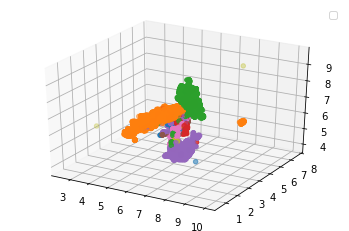

In [ ]:
# good separations on 50k embeds: 64 comp, 500 neighbors, 0.5 dist; 60,15,11; 14,59,60 (blue also); 20,49,59; 15,18,19; 15,18,20; 15,18,25

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.legend()

ax.scatter(
    # s_umap_embeds[:, 62],
    # s_umap_embeds[:, 34],
    # s_umap_embeds[:, 38],
    
    s_umap_embeds[:, 60],
    s_umap_embeds[:, 33],
    s_umap_embeds[:, 38],


    c=[c_palette[int(x)] for x in tab_test.nsub]
    )

    # c=[c_palette[int(x)] for x in k])


In [ ]:
# import seaborn as sns

c_palette=sns.color_palette(n_colors=64)
c_palette[6]

(0.8901960784313725, 0.4666666666666667, 0.7607843137254902)

In [ ]:
print(tab_for_embed.groupby("nsub").size().count(), "- number of different oligomeric assemblies")
print(tab_for_embed.shape, "shape of conf_plus")
tab_for_embed.groupby("nsub").size().sort_values(ascending=False)

19 - number of different oligomeric assemblies
(31994, 7) shape of conf_plus


nsub
1.0     14954
2.0     10967
4.0      2937
3.0      1308
6.0       864
8.0       325
12.0      187
5.0       140
24.0      126
10.0      104
14.0       38
7.0        22
9.0         6
16.0        5
60.0        4
11.0        3
13.0        2
15.0        1
18.0        1
dtype: int64

In [ ]:
# [list(j) for i in itertools.combinations([1,2,3],2) for j in itertools.permutations(list(i)+[4])]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for x in list(itertools.combinations(list(range(1, 64)),2)):
  ax.scatter(
    s_umap_embeds[:, x[0]],
    s_umap_embeds[:, 10],
    s_umap_embeds[:, 5],

    c=[c_palette[int(x)] for x in tab_test.nsub])
  plt.savefig(f"drive/MyDrive/OrlyPred/figs/3d_fig_{x[0]}_10_5.png")  